In [1]:
# import ipy_autoreload
%reload_ext autoreload
%autoreload 2
%aimport isochrone
from isochrone import *

import os
import geopandas as gpd
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, Polygon
import alphashape
import cartopy.crs as ccrs

In [2]:
city = 'Cambridge'

In [3]:
gdf_nodes, all_lts, G_lts = load_files(city)

G1, G2, G3, G4, G1b, G2b, G3b, G4b = lts_map_graphs(G_lts, all_lts, gdf_nodes)

In [4]:
# alpha_shape = alphashape.alphashape(gdf_nodes, alpha=0)
alpha_shape = alphashape.alphashape(gdf_nodes, alpha=200)

In [5]:
from shapely.prepared import prep
gridCount = 10

alpha_polygon = alpha_shape.iloc[0,0]

# determine maximum edges
latmin, lonmin, latmax, lonmax = alpha_polygon.bounds
latres = (latmax - latmin) / gridCount
lonres = (lonmax - lonmin) / gridCount

# create prepared polygon
prep_polygon = prep(alpha_polygon)

# construct a rectangular mesh
points = []
for lat in np.arange(latmin, latmax, latres):
    for lon in np.arange(lonmin, lonmax, lonres):
        points.append(Point((round(lat,4), round(lon,4))))

# validate if each point falls inside shape using
# the prepared polygon
valid_points = list(filter(prep_polygon.contains, points))


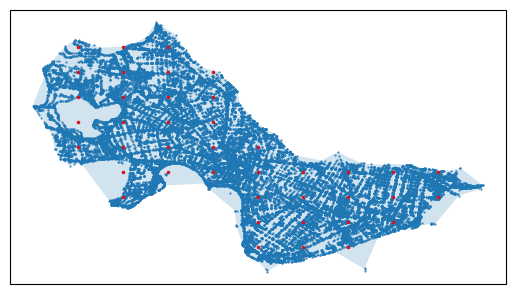

In [6]:
 # Initialize plot
ax = plt.axes(projection=ccrs.PlateCarree())

 # Plot input points
gdf_proj = gdf_nodes.to_crs(ccrs.Robinson().proj4_init)
ax.scatter([p.x for p in gdf_proj['geometry']],
            [p.y for p in gdf_proj['geometry']],
            transform=ccrs.Robinson(),
            marker='.', s=1)

ax.scatter([p.x for p in valid_points],
            [p.y for p in valid_points],
          #   transform=ccrs.Robinson(),
            marker='.', s=10, c='r')

 # Plot alpha shape
ax.add_geometries(
     alpha_shape.to_crs(ccrs.Robinson().proj4_init)['geometry'],
     crs=ccrs.Robinson(), alpha=.2)

plt.show()

In [7]:
travel_speed = 15 #biking speed in km/hour

G1b, G2b, G3b, G4b = edge_travel_times(travel_speed, G1b, G2b, G3b, G4b)

LTS 4: 27143 nodes
LTS 3: 25157 nodes
LTS 2: 124 nodes
LTS 1: 113 nodes


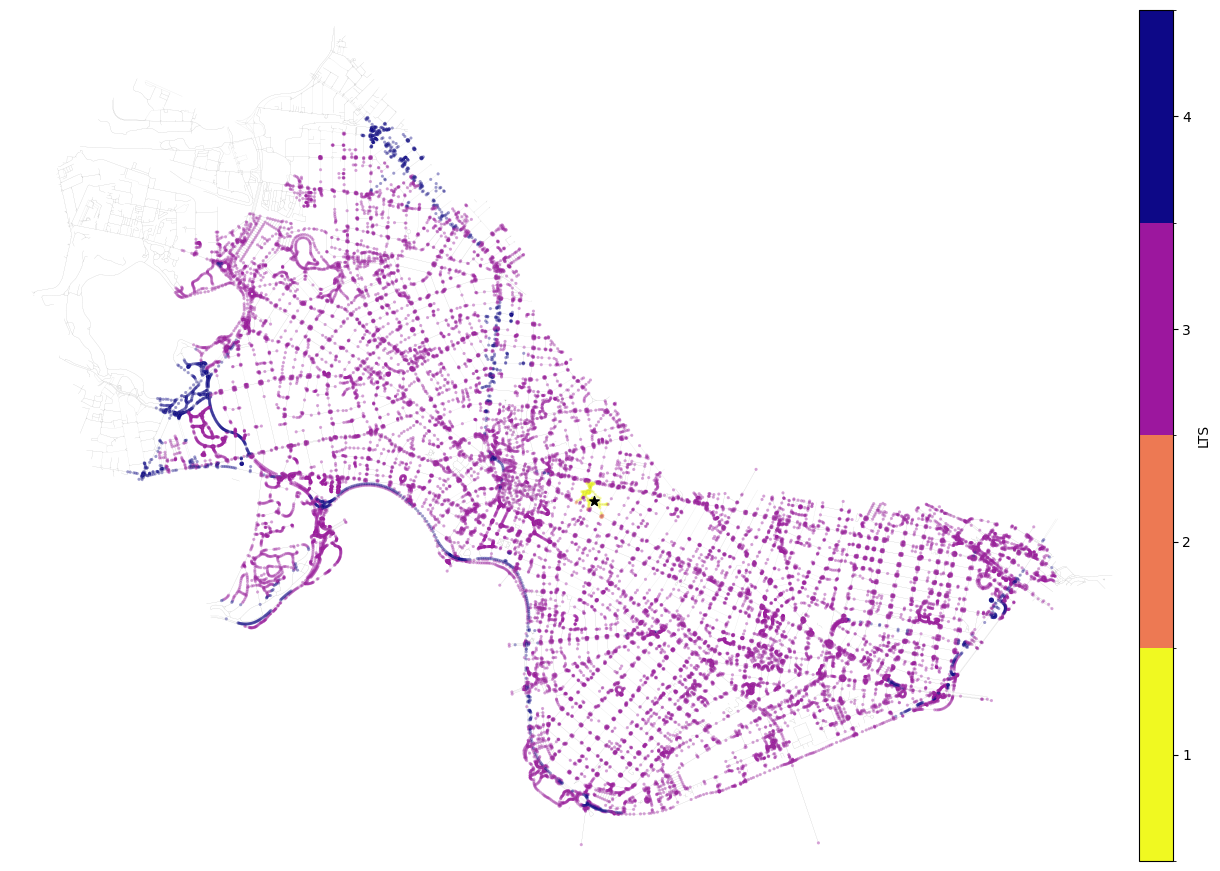

In [19]:
trip_time = 15 # minutes

# point to start isochrone plot from
y = 42.373696
x = -71.110564

point, nodeID = nearest_node(x, y, G1)

node_colors = point_isochrone(nodeID, trip_time, G1b, G2b, G3b, G4b)

point_isochrone_plot(city, point, node_colors, trip_time, G4b)

In [21]:
for i, pt in enumerate(valid_points):
    print(f'\nPoint {i} at {pt.y}, {pt.y}')
    point, nodeID = nearest_node(pt.x, pt.y, G1)
    point_isochrone(nodeID, trip_time, G1b, G2b, G3b, G4b)


Point 0 at 42.3778, 42.3778
LTS 4: 17293 nodes
LTS 3: 14339 nodes
LTS 2: 4942 nodes
LTS 1: 10 nodes

Point 1 at 42.3831, 42.3831
LTS 4: 16724 nodes
LTS 3: 13090 nodes
LTS 2: 5742 nodes
LTS 1: 1549 nodes

Point 2 at 42.3884, 42.3884
LTS 4: 15876 nodes
LTS 3: 14202 nodes
LTS 2: 6858 nodes
LTS 1: 1549 nodes

Point 3 at 42.3937, 42.3937
LTS 4: 11850 nodes
LTS 3: 10366 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 4 at 42.399, 42.399
LTS 4: 261 nodes
LTS 3: 245 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 5 at 42.3672, 42.3672
LTS 4: 14712 nodes
LTS 3: 686 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 6 at 42.3725, 42.3725
LTS 4: 19136 nodes
LTS 3: 686 nodes
LTS 2: 114 nodes
LTS 1: 1 nodes

Point 7 at 42.3778, 42.3778
LTS 4: 20106 nodes
LTS 3: 16899 nodes
LTS 2: 6796 nodes
LTS 1: 1 nodes

Point 8 at 42.3831, 42.3831
LTS 4: 1 nodes
LTS 3: 1 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 9 at 42.3884, 42.3884
LTS 4: 18213 nodes
LTS 3: 16836 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 10 at 42.3937, 42.39